In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_train=pd.read_csv("train.csv")
titanic_test=pd.read_csv("test.csv")

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.shape

(891, 12)

In [4]:
titanic_test.shape

(418, 11)

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling of Missing Values

In [6]:
titanic_train=titanic_train.drop(['Cabin'],axis=1)

In [7]:
titanic_train['Age'].fillna(titanic_train['Age'].mean(),inplace =True)
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)

Age colum we filled with mean because only 10% data were null.

Cabin data almost 80% data is null value so we dropped that column

Embarked column having catagorical data so missing value filled with mode

In [8]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

In [9]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

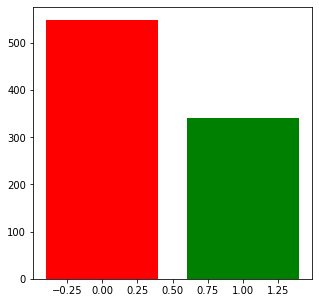

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=['r','g'])
plt.show()

In [11]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

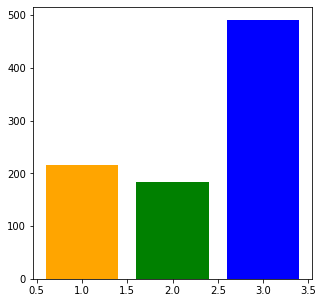

In [12]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=['blue','orange','green'])
plt.show()

In [13]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

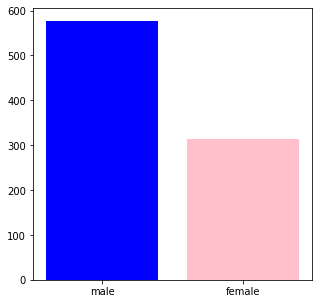

In [14]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=['blue','pink'])
plt.show()

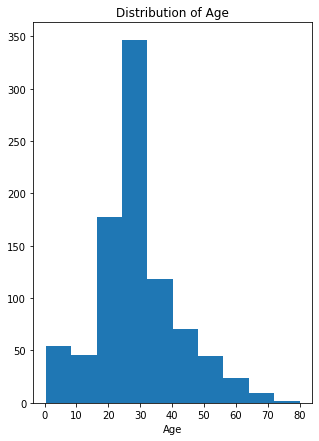

In [15]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

In [16]:
titanic_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


# Converting catagorical values

In [17]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
titanic_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
titanic_train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [20]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Seperating Target and Variable

In [21]:
x = titanic_train.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y = titanic_train['Survived']

In [22]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [23]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [25]:
print(x.shape,xtrain.shape,xtest.shape)

(891, 7) (712, 7) (179, 7)


In [26]:
#Model Building


In [27]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
lrc.fit(xtrain,ytrain)

C:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
#Evaluation of model

In [29]:
#accuracy for training data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypredict_training=lrc.predict(xtrain)

In [30]:
print(ypredict_training)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

In [31]:
accuracy_score_training=accuracy_score(ytrain,ypredict_training)
print('Accuracy of model on training data by using Logistic regression :',accuracy_score_training)

Accuracy of model on training data by using Logistic regression : 0.8019662921348315


In [33]:
#accuracy of model on test data
ypredict_test=lrc.predict(xtest)
accuracy_score_test=accuracy_score(ytest,ypredict_test)
print('Accuracy of model on test data :',accuracy_score_test)

Accuracy of model on test data : 0.7988826815642458


## By using random forest classifier


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=250)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=250)

In [57]:
ypredict_training_forest=rfc.predict(xtrain)

In [58]:
accuracy_score_training_forest=accuracy_score(ytrain,ypredict_training_forest)
print('Accuracy of model on training data by using Random forest Classifier:',accuracy_score_training_forest)

Accuracy of model on training data by using Random forest Classifier: 0.9803370786516854


In [61]:
#accuracy of model on test data
ypredict_test_forest=rfc.predict(xtest)
accuracy_score_test_forest=accuracy_score(ytest,ypredict_test_forest)
print('Accuracy of model on test data by using Random forest Classifier :',round(accuracy_score_test_forest*100))

Accuracy of model on test data by using Random forest Classifier : 82


# Reading and testing test dataset

In [ ]:
titanic_test=pd.read_csv('test.csv')
titanic_test.head()

In [ ]:
titanic_test.isnull().sum()

In [ ]:
titanic_test.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic_test['Age'].fillna(titanic_test['Age'].mean(),inplace =True)

In [ ]:
titanic_test['Fare'].mean()

In [ ]:
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(),inplace =True)

In [ ]:
titanic_test.isnull().sum()

In [ ]:
x_test_data=titanic_test.drop(['PassengerId','Cabin','Ticket','Name'],axis=1)

In [ ]:
x_test_data.head()

In [ ]:
x_test_data.isnull().sum()

## Model evaluation for test dataset 

### 2.By using Random forest Classifier

In [ ]:
ypredict_training_forest=rfc.predict(x_test_data)

In [ ]:
ypredict_training_forest

# Submission

In [ ]:
submission=titanic_test[['PassengerId']]

In [ ]:
submission

In [ ]:
submission.shape

In [ ]:
submission['Survived']=ypredict_training_forest

In [ ]:
submission.head()

In [ ]:
submission.shape

In [ ]:
submission.to_csv('submission.csv',index=None)

In [ ]:
anu=pd.read_csv('submission.csv')

In [ ]:
anu.head()